# Introduction 

This code file is intended to complie the effort of 4194/6194 ISE students to write a project on regressrion and classification problem. For the regression part we chose UCI Machine Learning Repository: Airfoil Self-Noise Data Set and for the classification problem we have Kaggle: GSTRB - German Traffic Sign Recognition Benchmark dataset. The body of the rest of the section is as follows (a) Regression Model, (b) Classification Model.

With the help of this project we are willing to achieve two things:- 

1. Building a model which can find a way to decrease sound generated by aircraft, wind turbines etc. The findings of the report can be used in future to make accurate decision while buliding a aircraft or wind turbine.
2. Build a model which can detect the road sign for the car in order to increase the safety of the passenger. As with the detection of the road sign passenger will be able to take a sound decision while driving.

# Regression Model

# Overview

Acoustic noise produced by airfoils has become an increasingly important area of study as it directly impacts the noise levels generated by aircraft, wind turbines, and other systems that rely on airfoil designs. Accurate prediction of airfoil self-noise is crucial for optimizing these designs and minimizing their noise footprint. This report presents an analysis of the airfoil self-noise dataset available at the UCI Machine Learning Repository and develops linear and polynomial regression models to predict the self-noise.

# Attribute Information
There are 5 input features in this dataset:

1. Frequency in Hertzs
2. Angle of Attack in degrees
3. Chord length, in meters
4. Free-stream velocity, in meters per second
5. Suction side displacement thickness in meter

There is only one output:

1. Scaled sound pressure level in decibels


In [19]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import metrics


warnings.filterwarnings("ignore")

In [20]:
# Import the data file
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'
column_names = ['Frequency', 'Angle_of_attack', 'Chord_length', 'Free_stream_velocity', 'Suction_side_displacement_thickness', 'Sound_pressure_level']
df = pd.read_csv(url, sep='\t', names=column_names)

print(df.head())

   Frequency  Angle_of_attack  Chord_length  Free_stream_velocity  \
0        800              0.0        0.3048                  71.3   
1       1000              0.0        0.3048                  71.3   
2       1250              0.0        0.3048                  71.3   
3       1600              0.0        0.3048                  71.3   
4       2000              0.0        0.3048                  71.3   

   Suction_side_displacement_thickness  Sound_pressure_level  
0                             0.002663               126.201  
1                             0.002663               125.201  
2                             0.002663               125.951  
3                             0.002663               127.591  
4                             0.002663               127.461  


In [21]:
# Dimension of the dataset
df.shape

(1503, 6)

In [22]:
df.describe()

,Frequency,Angle_of_attack,Chord_length,Free_stream_velocity,Suction_side_displacement_thickness,Sound_pressure_level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Frequency                            1503 non-null   int64  
 1   Angle_of_attack                      1503 non-null   float64
 2   Chord_length                         1503 non-null   float64
 3   Free_stream_velocity                 1503 non-null   float64
 4   Suction_side_displacement_thickness  1503 non-null   float64
 5   Sound_pressure_level                 1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


## Step 2: Exploratory data analysis

**Missing Value**

Text(0.5, 1.0, 'Missing value in the dataset')

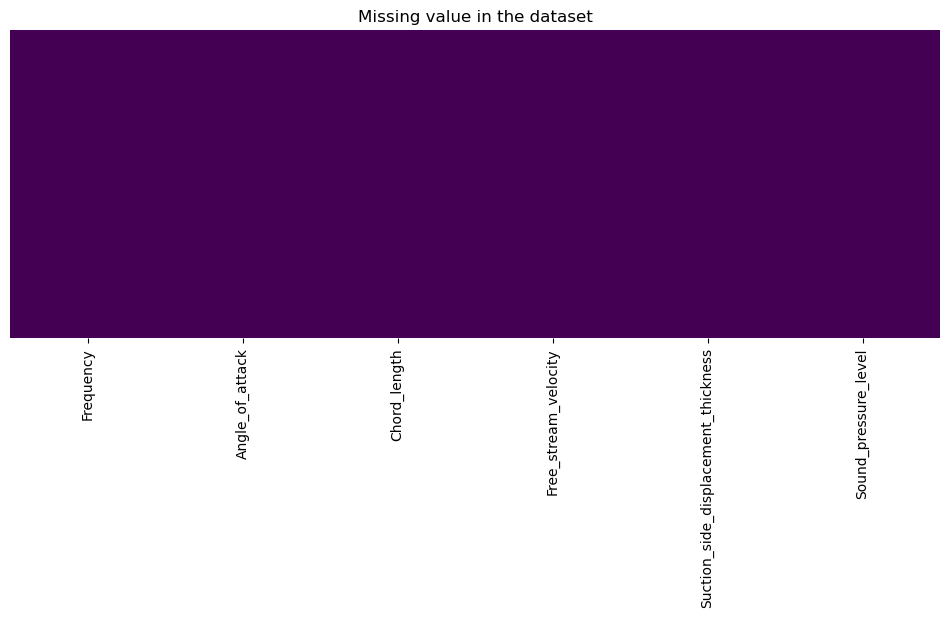

In [24]:
# Determine if there is missing value
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing value in the dataset")

There is no missing value in the dataset.

**Output Analysis**

In [25]:
df['Sound_pressure_level'].describe()

count    1503.000000
mean      124.835943
std         6.898657
min       103.380000
25%       120.191000
50%       125.721000
75%       129.995500
max       140.987000
Name: Sound_pressure_level, dtype: float64

<AxesSubplot:xlabel='Sound_pressure_level', ylabel='Density'>

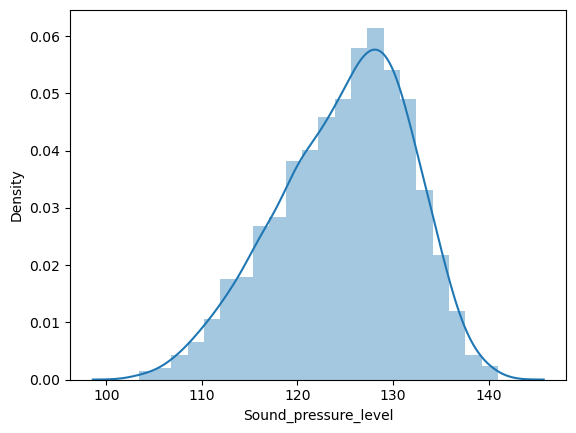

In [26]:
sns.distplot(df['Sound_pressure_level'])

In [27]:
# Skewness and kurtosis
print("Skewness: %f" % df['Sound_pressure_level'].skew())
print("Kurtosis: %f" % df['Sound_pressure_level'].kurt())

Skewness: -0.418952
Kurtosis: -0.314187


This indicates the sound pressure level data has a slightly left-skewed distribution with fewer extreme values and thinner tails compared to a normal distribution.

## Relationship with variables

Sactter plot and box plot of each feature are plotted to visualize the relationship between each variable and the output.

1. Frequency vs. Sound Pressure Level

<AxesSubplot:xlabel='Frequency', ylabel='Sound_pressure_level'>

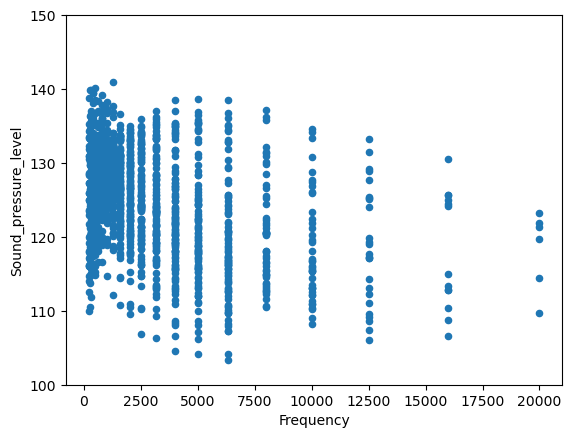

In [28]:
# Scatter plot of Frequency vs. Sound pressure level
var = 'Frequency'
data_F = pd.concat([df['Sound_pressure_level'], df[var]], axis=1)
data_F.plot.scatter(x=var, y='Sound_pressure_level', ylim=(100, 150))

(-0.5, 20.5, 100.0, 150.0)

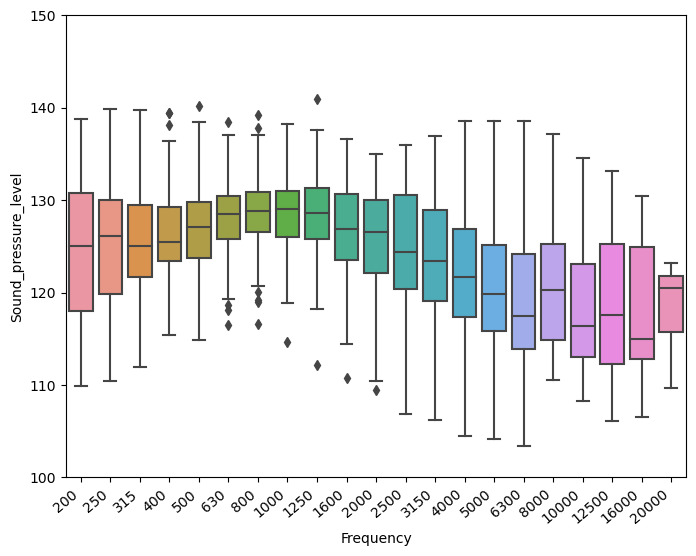

In [29]:
# Box plot of Frequency vs. Sound pressure
fig, ax = plt.subplots(figsize=(8,6))

# Rotate the x-axis labels to avoid overlapping
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig = sns.boxplot(x=var, y="Sound_pressure_level", data=data_F)
fig.axis(ymin=100, ymax=150)

2. Angle of Attack vs. Sound Pressure Level

<AxesSubplot:xlabel='Angle_of_attack', ylabel='Sound_pressure_level'>

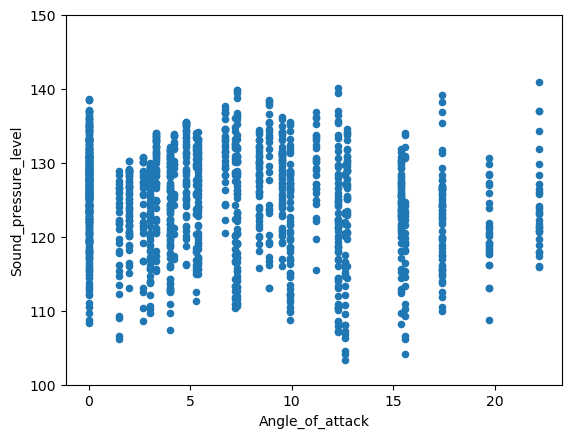

In [30]:
# Scatter plot of Angle of Attack vs. Sound pressure level
var = 'Angle_of_attack'
data_A = pd.concat([df['Sound_pressure_level'], df[var]], axis=1)
data_A.plot.scatter(x=var, y='Sound_pressure_level', ylim=(100, 150))

(-0.5, 26.5, 100.0, 150.0)

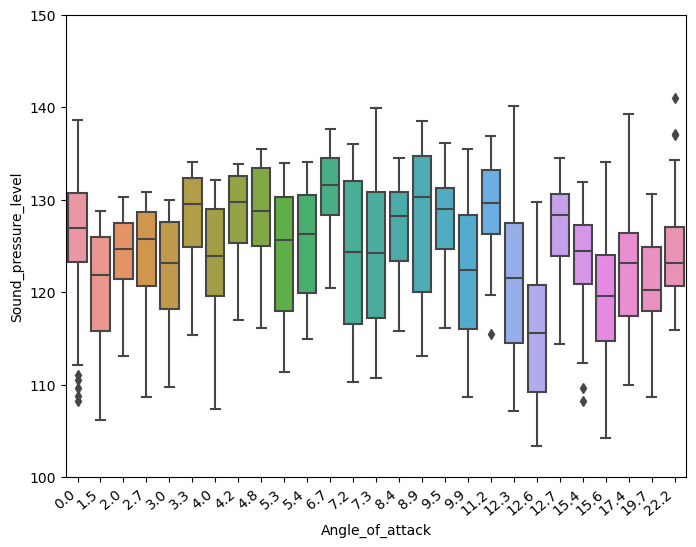

In [31]:
# Box plot of Angle of Attack vs. Sound pressure
fig, ax = plt.subplots(figsize=(8,6))

# Rotate the x-axis labels to avoid overlapping
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


fig = sns.boxplot(x=var, y="Sound_pressure_level", data=data_A)
fig.axis(ymin=100, ymax=150)

3. Chord_length vs. Sound Pressure Level

<AxesSubplot:xlabel='Chord_length', ylabel='Sound_pressure_level'>

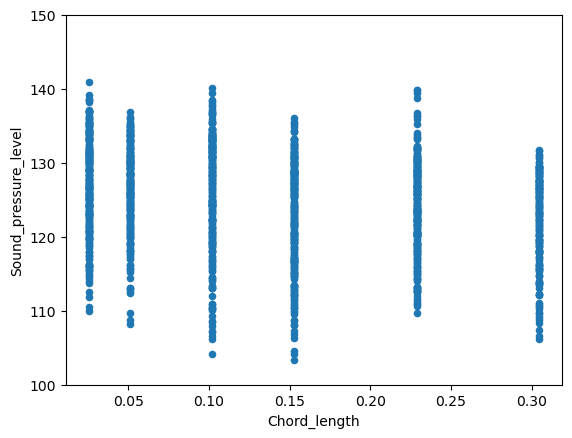

In [32]:
# Scatter plot of Chord Length vs. Sound pressure level
var = 'Chord_length'
data_C = pd.concat([df['Sound_pressure_level'], df[var]], axis=1)
data_C.plot.scatter(x=var, y='Sound_pressure_level', ylim=(100, 150))

(-0.5, 5.5, 100.0, 150.0)

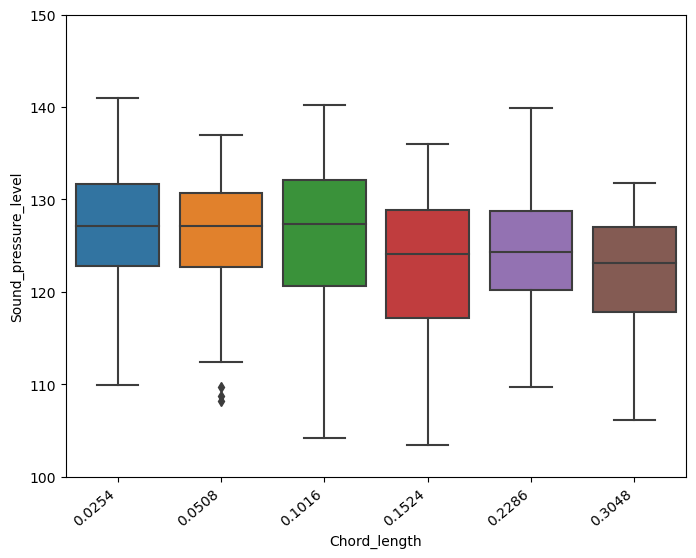

In [33]:
# Box plot of Chord Length vs. Sound pressure
fig, ax = plt.subplots(figsize=(8,6))

# Rotate the x-axis labels to avoid overlapping
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig = sns.boxplot(x=var, y="Sound_pressure_level", data=data_C)
fig.axis(ymin=100, ymax=150)

4. Free Stream Velocity vs. Sound Pressure Level

<AxesSubplot:xlabel='Free_stream_velocity', ylabel='Sound_pressure_level'>

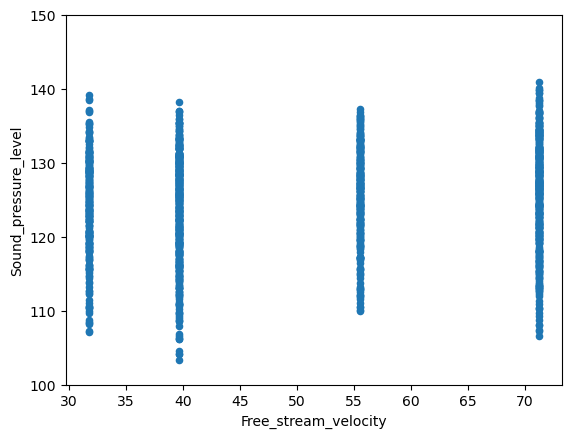

In [34]:
# Scatter plot of Free Stream Velocity vs. Sound pressure level
var = 'Free_stream_velocity'
data_V = pd.concat([df['Sound_pressure_level'], df[var]], axis=1)
data_V.plot.scatter(x=var, y='Sound_pressure_level', ylim=(100, 150))

(-0.5, 3.5, 100.0, 150.0)

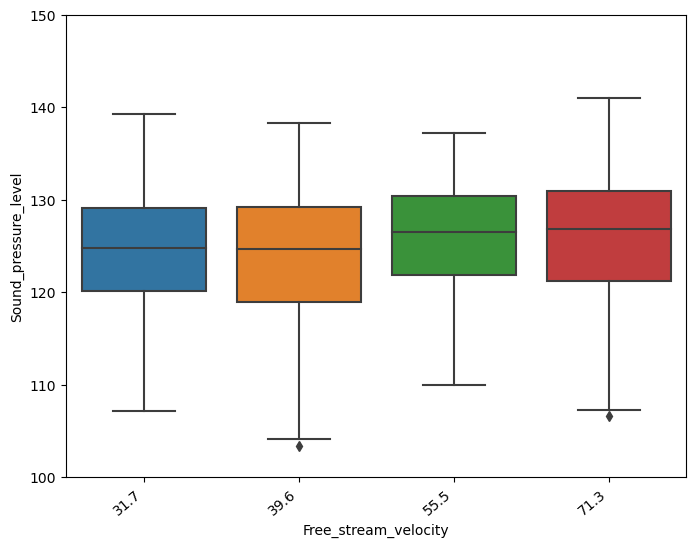

In [35]:
# Box plot of Free Stream Velocity vs. Sound pressure
fig, ax = plt.subplots(figsize=(8,6))

# Rotate the x-axis labels to avoid overlapping
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig = sns.boxplot(x=var, y="Sound_pressure_level", data=data_V)
fig.axis(ymin=100, ymax=150)

5. Suction Side Displacement Thickness vs. Sound Pressure Level

<AxesSubplot:xlabel='Suction_side_displacement_thickness', ylabel='Sound_pressure_level'>

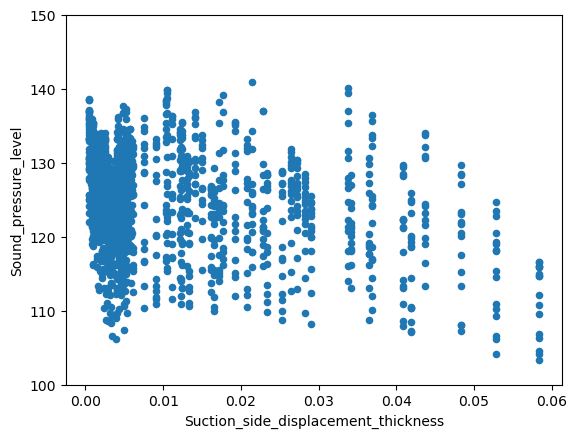

In [36]:
# Scatter plot of Suction Side Displacement Thickness vs. Sound pressure level
var = 'Suction_side_displacement_thickness'
data_S = pd.concat([df['Sound_pressure_level'], df[var]], axis=1)
data_S.plot.scatter(x=var, y='Sound_pressure_level', ylim=(100, 150))

(-0.5, 104.5, 100.0, 150.0)

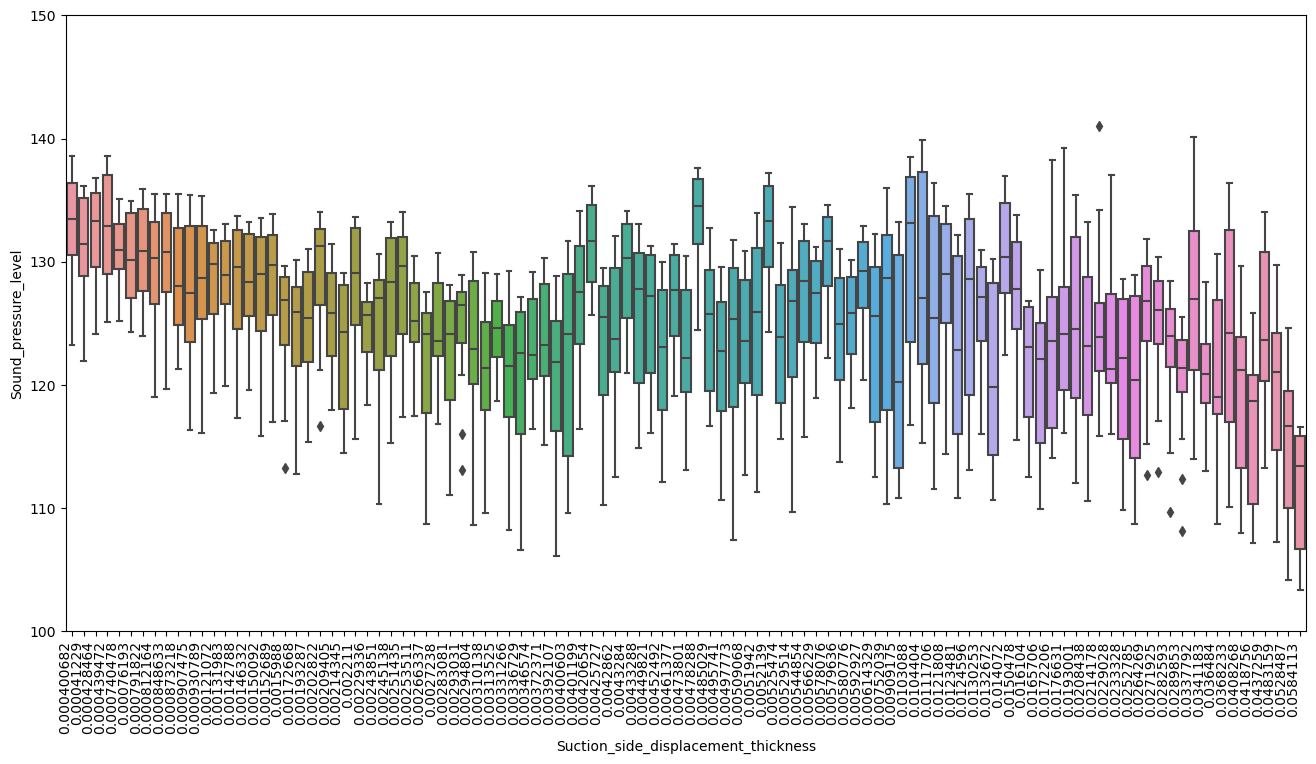

In [37]:
# Box plot of Suction Side Displacement Thickness vs. Sound pressure
fig, ax = plt.subplots(figsize=(16,8))

# Rotate the x-axis labels to avoid overlapping
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

fig = sns.boxplot(x=var, y="Sound_pressure_level", data=data_S)
fig.axis(ymin=100, ymax=150)

### Scatter plots between Sound Pressure Level and variables

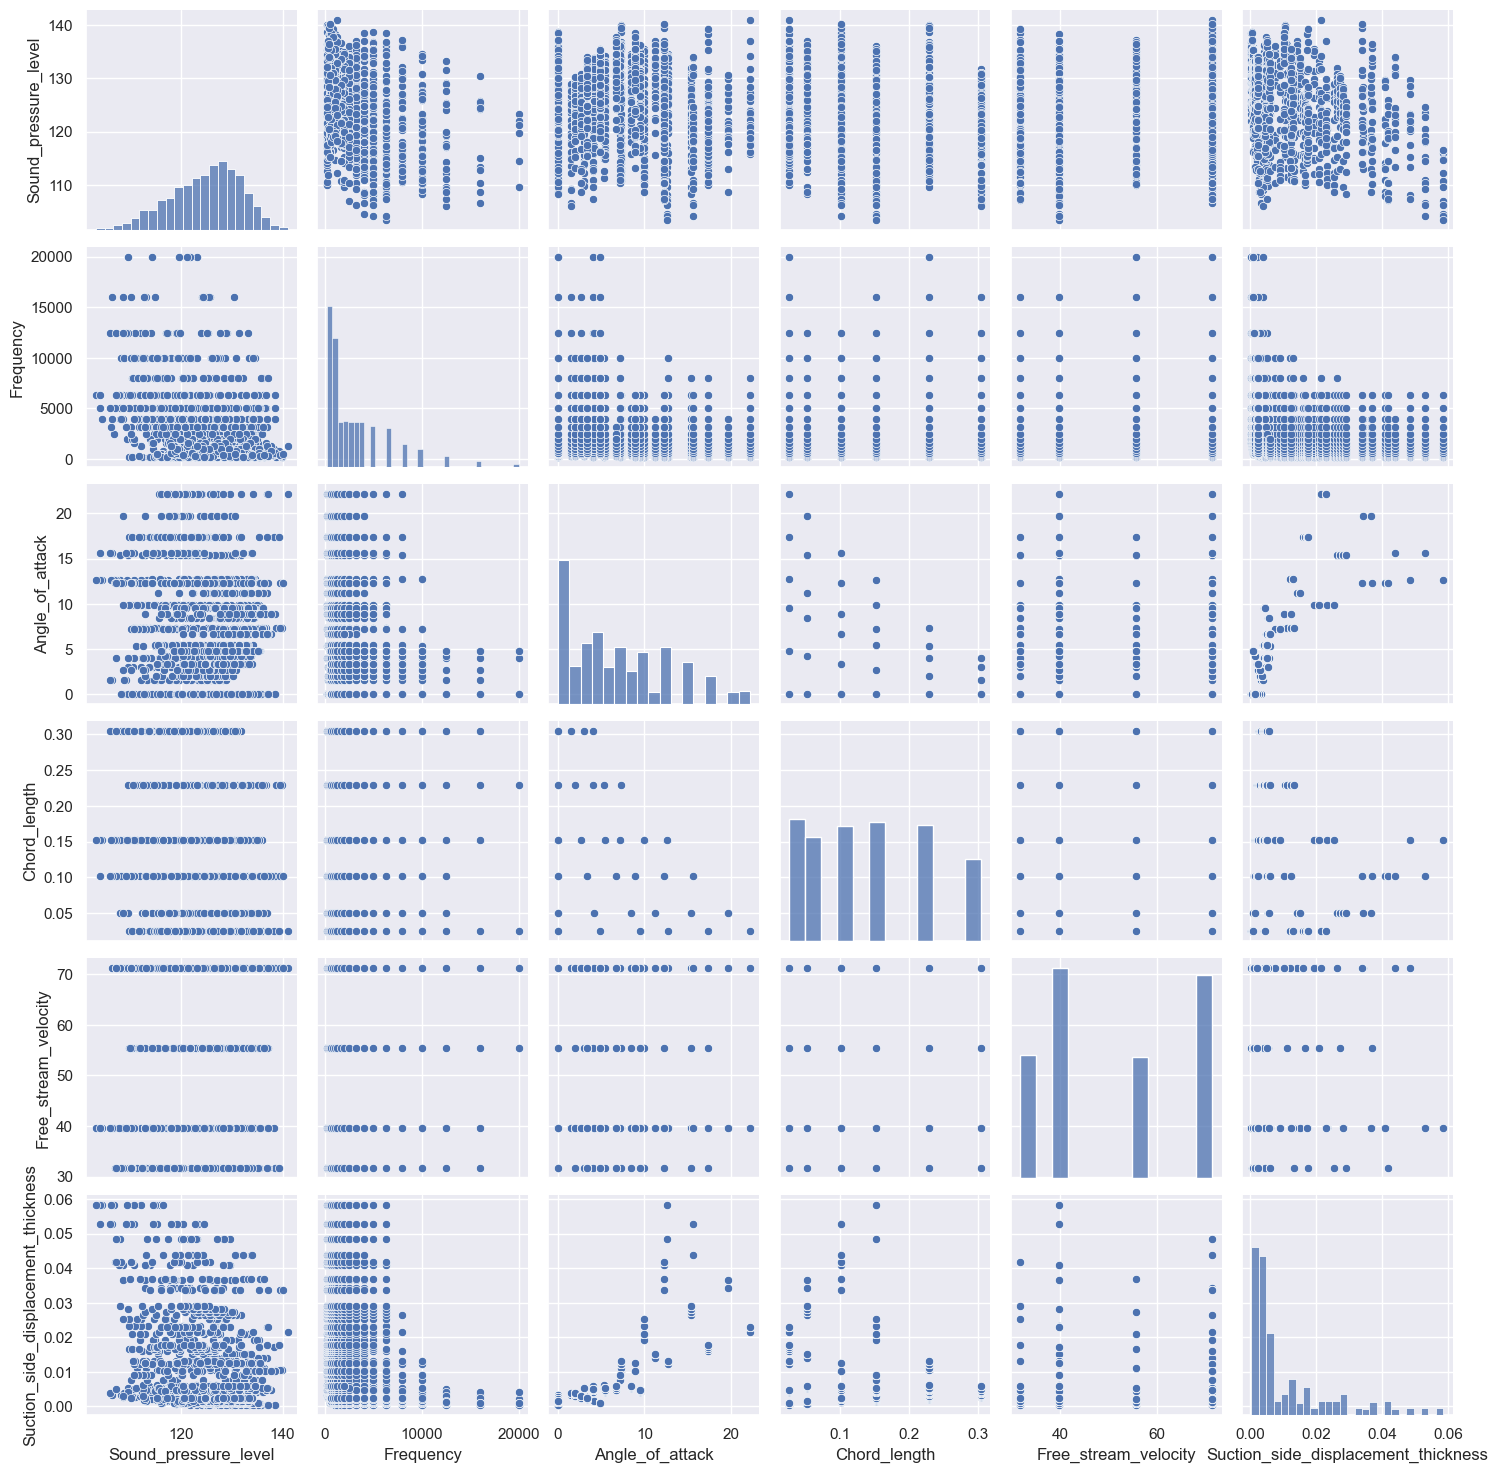

In [38]:
# Scatterplot
sns.set()
cols = ['Sound_pressure_level', 'Frequency', 'Angle_of_attack', 'Chord_length', 'Free_stream_velocity', 'Suction_side_displacement_thickness']
sns.pairplot(df[cols], size = 2.5)
plt.show()

### Correlation Matrix

<AxesSubplot:>

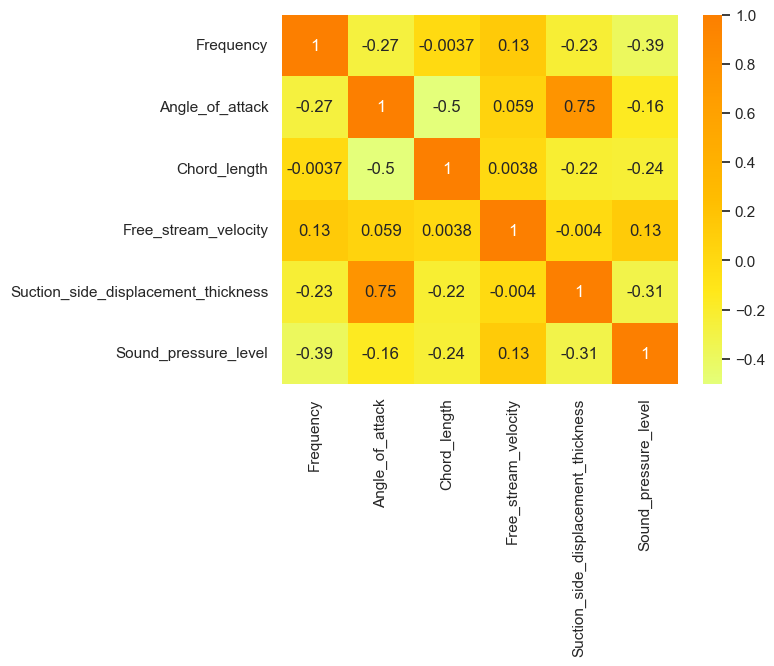

In [39]:
# Correlation plot
corr = df.corr()
sns.heatmap(corr, cmap='Wistia', annot=True)

According to the correlation matrix, we observe:

1. Frequency is most strongly correlated with Sound pressure level among all variables (Cor = -0.39).

2. There is a strong correlation between Angle of Attack and Suction Side Displacement Thickness (Cor = 0.75).

3. There is a relative strong negative correlation between Chord Length and Angle of Attack (Cor = -0.5).

### Multicollinearities

In [40]:
# Calculate the VIF value
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the features as a dataframe
X_df = df[list(df.columns[:-1])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif_info['Column'] = X_df.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
3,7.148723,Free_stream_velocity
1,6.557489,Angle_of_attack
4,4.299617,Suction_side_displacement_thickness
2,3.254447,Chord_length
0,1.942627,Frequency


We can observe that the VIF values of Free_stream_velocity, Angle_of_attack and Suction_side_displacement_thickness are relatively high (above 4). In order to create a more accurate model, we need to clean those multicollinearities from the data.

Based on the correlation matrix, the Angle of attack and Suction side displacement is highly correlated with each other. For these two features, we can replace them with a principle component.

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(np.array(df[['Angle_of_attack', 'Suction_side_displacement_thickness']]))
print("Variance explained: ", pca.explained_variance_)

y = pca.transform(np.array(df[['Angle_of_attack', 'Suction_side_displacement_thickness']]))
new_variable = pd.DataFrame(y)

X_df['New_variable'] = new_variable

Variance explained:  [35.02433866]


In [42]:
# Drop columns
X_df = X_df.drop(['Angle_of_attack', 'Suction_side_displacement_thickness'], axis=1)
X_df.head()

,Frequency,Chord_length,Free_stream_velocity,New_variable
0,800,0.3048,71.3,-6.782307
1,1000,0.3048,71.3,-6.782307
2,1250,0.3048,71.3,-6.782307
3,1600,0.3048,71.3,-6.782307
4,2000,0.3048,71.3,-6.782307


In [43]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif_info['Column'] = X_df.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
2,4.464768,Free_stream_velocity
1,3.521775,Chord_length
0,2.025104,Frequency
3,1.443104,New_variable


Now we have all variables with VIF values are less than 5. With these variables, we can build our regression model and obtain interpretable results.

### Step 3: Preprocess Dataset

In [44]:
# Define the X and y
X = X_df.values
# X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

# Normalize the features
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.2, random_state=102)

## Step 4: Build the Model

### Multi-Linear Regression Model

R squared:  0.5427664889174263
Linear Regression Model Mean Absolute Error: 0.57
intercept: 0.001494634696208249
slope: [-0.58710775 -0.52485794  0.24310218 -0.59069077]


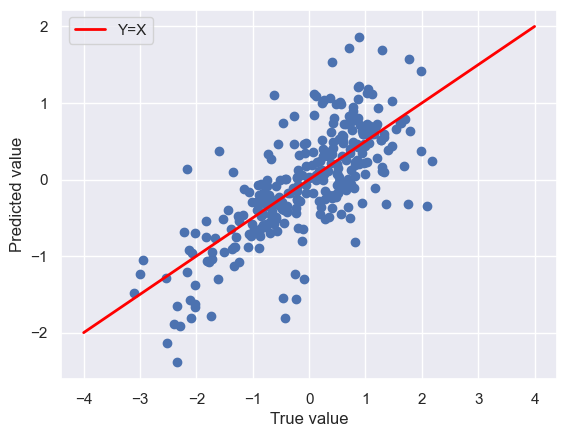

In [45]:
# Fit the LR model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Calculate the accuracy
accuracy = lr.score(X_test, y_test)
print("R squared: ", accuracy)

# Cross validation score
lr_scores = -cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Linear Regression Model Mean Absolute Error: {np.mean(lr_scores):.2f}")

# Print the Intercept:
print('intercept:', lr.intercept_)

# Print the Slope:
print('slope:', lr.coef_)

# Plot the predicted result vs true result
plt.scatter(y_test, y_pred)
plt.plot(np.linspace(-4, 4, 100), np.linspace(-2, 2, 100), label='Y=X', color='red', lw=2)
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.legend()
plt.show()

### Polynomial Regression Model

R squared for Degree 1: 0.5427664889174264
Mean Suqared Error for Degree 1: 0.7077062597170882

R squared for Degree 2: 0.6270505234096904
Mean Suqared Error for Degree 2: 0.6391591515983122

R squared for Degree 3: 0.7191984118664722
Mean Suqared Error for Degree 3: 0.5546050125946625

R squared for Degree 4: 0.72282926093635
Mean Suqared Error for Degree 4: 0.5510077414216737

R squared for Degree 5: 0.719378997774523
Mean Suqared Error for Degree 5: 0.5544266482946163

R squared for Degree 6: 0.571609851139117
Mean Suqared Error for Degree 6: 0.6850207837042037



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


R squared for Degree 7: -21.22586960928665
Mean Suqared Error for Degree 7: 4.9341618570901264



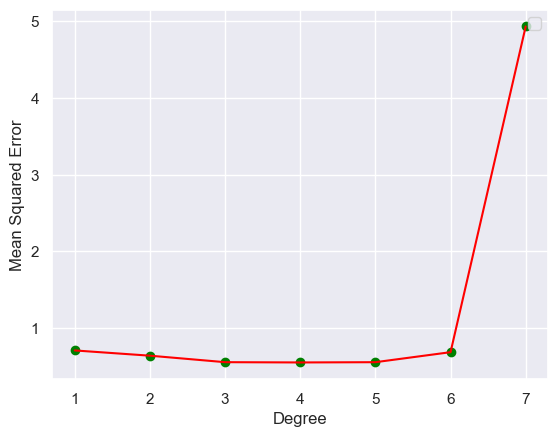

In [46]:
degrees = [1, 2, 3, 4, 5, 6, 7]
plt_mean_squared_error = []
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.fit_transform(X_test)
    poly.fit(X_poly_train, y_train)

    pol_reg = LinearRegression()
    pol_reg.fit(X_poly_train, y_train)
    y_pred = pol_reg.predict(X_poly_test)

    # Calculate the accuracy
    R_square = pol_reg.score(X_poly_test, y_test)
    print(f"R squared for Degree {degree}: {R_square}")

    # Calculate the mean squared error
    plt_mean_squared_error.append(metrics.mean_squared_error(y_test, y_pred, squared=False))
    print(f"Mean Suqared Error for Degree {degree}: {plt_mean_squared_error[-1]}\n")

plt.scatter(degrees, plt_mean_squared_error, color='green')
plt.plot(degrees, plt_mean_squared_error, color='Red')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

### Conclusion

In this report, we performed an analysis of the airfoil self-noise dataset and developed linear and polynomial regression models to predict the sound pressure level (SPL). The polynomial regression model with degree 4 outperformed the linear regression model, achieving an R-squared value of 0.72 and a mean absolute error of 0.55. These models can be used to guide future airfoil design optimizations and help reduce noise pollution from various applications, such as aircraft and wind turbines.

# Classification Model

## Overview 

The main objective of this project is to develop an ML model that can accurately classify different types of traffic signs. This model can be used in identifying the traffic signs and help improve road safety.  The dataset has 43 classes and 50,000 images in total. 
In the model we will resize the data and convert it into grayscale. For the SVM part we will classify between Speed limit (20km/h), Speed limit (30km/h) and for the CNN part we will try to accurately predict all the 43 signs in the dataset. For the CNN we will tune the hyperparameter like the number of epochs, learning rate and the layers of the neural network. To check the efficacy of the model we have printed the accucracy of the model and try to visualize the predicted set of images from the model. 


## Attribute Information 

1. The given model has traffic signs from the German Traffic sign dataset. 

2. There are 43 classes in the data.

In [1]:
# Importing the packages 

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms
from sklearn import svm
from sklearn.metrics import accuracy_score

### Step 1: Load the dataset 

In [2]:
train_df = pd.read_excel('Train.xlsx')
test_df = pd.read_excel('Test.xlsx')

In [3]:
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


The ClassId and the Path defines the image or the data

### Displaying the sample image from the train data 

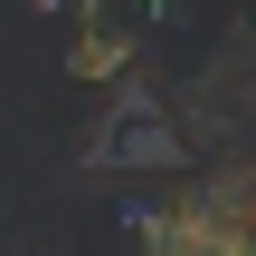

In [53]:

from IPython.display import display

image_path = 'Train/20/00020_00000_00000.png'

# open the image file using the PIL library
image = Image.open(image_path)

# resize the image to a larger size
resized_image = image.resize((256, 256))

# display the resized image in the notebook
display(resized_image)



### Step 2: Check for the missing values and number of data points for each classes in test and train dataset

Data shape:  (39209, 8)
Missing values:
 Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64


C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


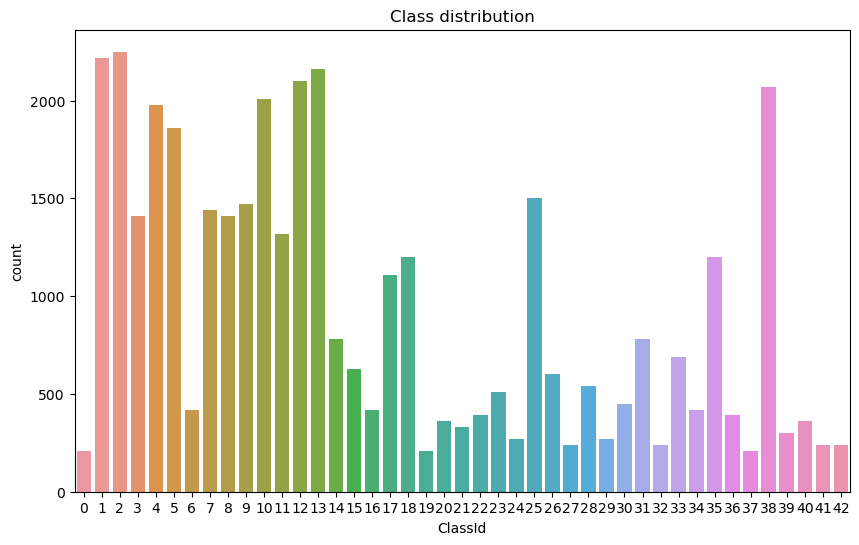

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the shape of the dataset
print("Data shape: ", train_df.shape)

# Check if there are any missing values
print("Missing values:\n", train_df.isnull().sum())

# Check the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(train_df["ClassId"])
plt.title("Class distribution")
plt.show()


1. The training set has 39209 images.

2. There are no missing rows in the train dataset.

3. The dataset consists of 43 classes of the traffic signs with atleast 250 image per class.


Data shape:  (12630, 8)
Missing values:
 Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64


C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


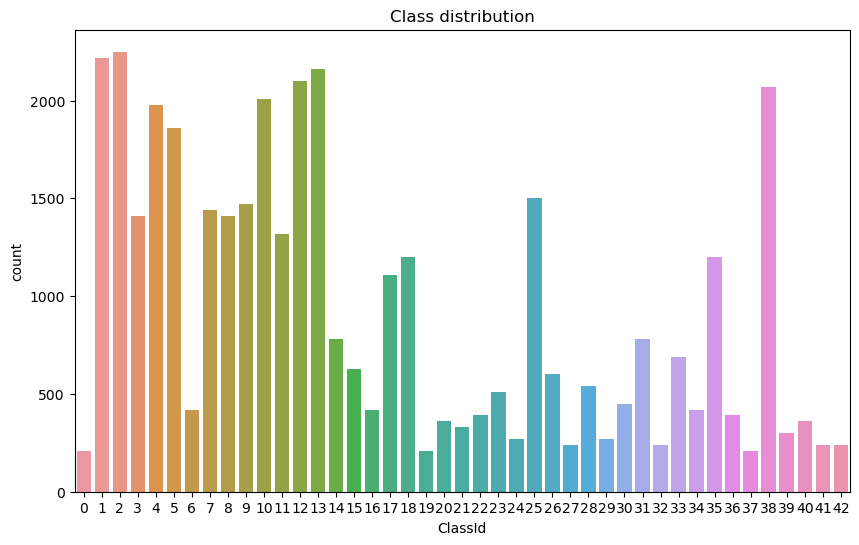

In [5]:

# Check the shape of the dataset
print("Data shape: ", test_df.shape)

# Check if there are any missing values
print("Missing values:\n", test_df.isnull().sum())

# Check the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(train_df["ClassId"])
plt.title("Class distribution")
plt.show()

1. The test set has 12630 images.

2. There are no missing rows in the test dataset.

3. The dataset consists of 43 classes of the traffic signs with atleast 250 image per class.

### Step 3: Defining the TrafficSignDataset for instantiating the class

In [6]:

# Instantiate the class
class TrafficSignDataset(Dataset):
    def __init__(self, dataframe, transform):
        self.images = []
        self.labels = []
        self.transform = transform
        
        for index, row in dataframe.iterrows():
            img = Image.open(row['Path'])
            img = np.array(img)
            self.images.append(img)
            self.labels.append(row['ClassId'])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index]
        
        if self.transform:
            image = self.transform(image)
        return (image, torch.LongTensor([self.labels[index]]))

In [7]:
# Transform the image to a tensor of size 32x32
transform=transforms.Compose([transforms.ToPILImage(), transforms.Resize((32,32)), transforms.ToTensor()]) 

# Create the custom dataset objects and data loaders
train_dataset = TrafficSignDataset(train_df, transform)
test_dataset = TrafficSignDataset(test_df, transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, )
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True,)


### Step 4: Running the SVM model

First we will run SVM to classify between two classes i.e. Speed limit (20km/h), Speed limit (30km/h).

In [9]:
from sklearn import svm
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import cross_val_score



# Define the custom dataset class specially for running svm as we are classifying between only two class 
class TrafficSignDataset:
    def __init__(self, dataframe, transform):
        self.images = []
        self.labels = []
        self.transform = transform
        
        for index, row in dataframe.iterrows():
            img = Image.open(row['Path'])
            img = np.array(img)
            self.images.append(img)
            self.labels.append(row['ClassId'])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index]
        if self.transform:
            image = self.transform(image)
        return (image.view(-1), self.labels[index])
    


train_data = np.array([data[0].numpy() for data in train_dataset], dtype=object)
train_data = train_data.reshape(train_data.shape[0], -1) # Reshape to 2D array
train_labels = np.array([data[1] for data in train_dataset]).astype(np.int64)
test_data = np.array([data[0].numpy() for data in test_dataset], dtype=object)
test_data = test_data.reshape(test_data.shape[0], -1) # Reshape to 2D array
test_labels = np.array([data[1] for data in test_dataset]).astype(np.int64)

# Create and train the SVM model

clf = svm.SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM model on the full training set
clf.fit(train_data, train_labels)

# Make predictions on the test data
predictions = clf.predict(test_data)

# Evaluate the accuracy of the model
accuracy = accuracy_score(test_labels, predictions)
print('Test accuracy: %.2f%%' % (accuracy * 100))


C:\Users\abhis\AppData\Local\Temp\ipykernel_10416\3982724007.py:36: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  train_labels = np.array([data[1] for data in train_dataset]).astype(np.int64)
C:\Users\abhis\AppData\Local\Temp\ipykernel_10416\3982724007.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_labels = np.array([data[1] for data in train_dataset]).a

Test accuracy: 82.43%


The accuracy of the SVM model is 82.43% which is self explanatpry that why we need to proceed with the Convolutional Neural Network.

### Step 5: Runing the CNN Model

#### Before runnning the CNN model we tried to visulaize that if there is some sort of a similarity in the data points. For this purpose we used t-SNE. 

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\abhis\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 39209 samples in 0.094s...
[t-SNE] Computed neighbors for 39209 samples in 127.921s...
[t-SNE] Computed conditional probabilities for sample 1000 / 39209
[t-SNE] Computed conditional probabilities for sample 2000 / 39209
[t-SNE] Computed conditional probabilities for sample 3000 / 39209
[t-SNE] Computed conditional probabilities for sample 4000 / 39209
[t-SNE] Computed conditional probabilities for sample 5000 / 39209
[t-SNE] Computed conditional probabilities for sample 6000 / 39209
[t-SNE] Computed conditional probabilities for sample 7000 / 39209
[t-SNE] Computed conditional probabilities for sample 8000 / 39209
[t-SNE] Computed conditional probabilities for sample 9000 / 39209
[t-SNE] Computed conditional probabilities for sample 10000 / 39209
[t-SNE] Computed conditional probabilities for sample 11000 / 39209
[t-SNE] Computed conditional probabilities for sample 12000 / 39209
[t-SNE] Computed conditional probabilities for s

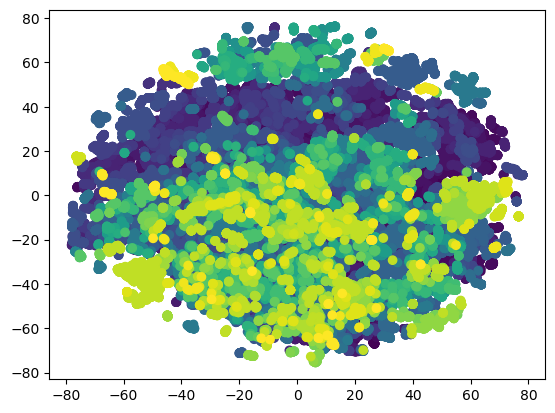

In [18]:
import pandas as pd
from sklearn.manifold import TSNE

# Loading the dataset 
train = pd.read_csv("train.csv")
images = []
labels = []
for i, row in train.iterrows():
    image = Image.open(row['Path'])
    image = np.array(image.resize((32, 32)))
    images.append(image.flatten())
    labels.append(row['ClassId'])
X_train = np.array(images)
y_train = np.array(labels)

# Apply t-SNE on the flattened data
tsne = TSNE(n_components=2, verbose=1)
X_tsne = tsne.fit_transform(X_train)

# Visualize the t-SNE embeddings
import matplotlib.pyplot as plt
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_train)
plt.show()


As we can see that the t-SNE plot does not have a cluster of any specific class, therefore its pertinent to buld a cnn model such that there is no overfitting. 

In [11]:
#Building the cnn model

class TrafficSignClassifier(nn.Module):
    def __init__(self):
        super(TrafficSignClassifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 4 * 4, 128)
        self.bn4 = nn.BatchNorm1d(128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 43)

    def forward(self, x):
        x = nn.functional.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)
        x = nn.functional.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)
        x = nn.functional.relu(self.bn3(self.conv3(x)))
        x = self.pool3(x)
        x = x.view(-1, 128 * 4 * 4)
        x = nn.functional.relu(self.bn4(self.fc1(x)))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


The above convolutional neural network (CNN) architecture is used for the image classification with 3 convolutional layers, 3 max-pooling layers, 3 Batch Normalization layer, and 2 fully connected (dense) layers. Batch Normalization Layer is additionally added to avoid overfitting.

**Input: 3-channel (RGB) image of size 32 x 32 pixels**

Convolutional layer with 3 input channels, 32 output channels, kernel size of 3, and padding of 1

Batch normalization layer after the first convolutional layer

Max pooling layer with kernel size of 2 and stride of 2

Convolutional layer with 32 input channels, 64 output channels, kernel size of 3, and padding of 1

Batch normalization layer after the second convolutional layer

Max pooling layer with kernel size of 2 and stride of 2

Convolutional layer with 64 input channels, 128 output channels, kernel size of 3, and padding of 1

Batch normalization layer after the third convolutional layer

Max pooling layer with kernel size of 2 and stride of 2

Fully connected layer with 128 * 4 * 4 input features and 128 output features

Batch normalization layer after the first fully connected layer

Dropout layer with a dropout rate of 0.5

Fully connected layer with 128 input features and 43 output features.


**Output: A probability distribution over the 43 classes, obtained by applying a softmax activation function to the output of the last dense layer.**


In [12]:
# Instantiate the class
class TrafficSignDataset(Dataset):
    def __init__(self, dataframe, transform):
        self.images = []
        self.labels = []
        self.transform = transform
        
        for index, row in dataframe.iterrows():
            img = Image.open(row['Path'])
            img = np.array(img)
            self.images.append(img)
            self.labels.append(row['ClassId'])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index]
        
        if self.transform:
            image = self.transform(image)
        return (image, torch.LongTensor([self.labels[index]])) # Return preprocessed image and its class ID 

In [13]:
# Instantiate the CNN model and define the loss function and optimizer
model = TrafficSignClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

 A low learning rate of 0.0001 is decided to avoid overfitting of the training data.

#### Collecting the loss values over 30 epochs

In [14]:
train_losses = []
test_losses = []
train_accs = []
test_accs = []
epoch_loss = []

# Train the model on the training data

for epoch in range(30):  
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data  
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.squeeze())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.squeeze()).sum().item()


        
    epoch_loss.append(running_loss / len(train_loader))
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(train_loader)))        

    train_losses.append(running_loss/len(train_loader))
    train_accs.append(correct/total)

# Testing the model on the test data    

    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            loss = criterion(outputs, labels.squeeze())
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels.squeeze()).sum().item()

    test_losses.append(running_loss/len(test_loader))
    test_accs.append(correct/total)

    print('Epoch %d, train loss: %.3f, test loss: %.3f, train acc: %.3f, test acc: %.3f'
          % (epoch + 1, train_losses[-1], test_losses[-1], train_accs[-1], test_accs[-1]))

    


Epoch 1 loss: 2.275
Epoch 1, train loss: 2.275, test loss: 1.646, train acc: 0.480, test acc: 0.633
Epoch 2 loss: 1.079
Epoch 2, train loss: 1.079, test loss: 1.009, train acc: 0.807, test acc: 0.788
Epoch 3 loss: 0.588
Epoch 3, train loss: 0.588, test loss: 0.706, train acc: 0.911, test acc: 0.847
Epoch 4 loss: 0.349
Epoch 4, train loss: 0.349, test loss: 0.532, train acc: 0.955, test acc: 0.880
Epoch 5 loss: 0.222
Epoch 5, train loss: 0.222, test loss: 0.450, train acc: 0.974, test acc: 0.894
Epoch 6 loss: 0.153
Epoch 6, train loss: 0.153, test loss: 0.385, train acc: 0.983, test acc: 0.905
Epoch 7 loss: 0.109
Epoch 7, train loss: 0.109, test loss: 0.347, train acc: 0.988, test acc: 0.911
Epoch 8 loss: 0.081
Epoch 8, train loss: 0.081, test loss: 0.327, train acc: 0.992, test acc: 0.909
Epoch 9 loss: 0.062
Epoch 9, train loss: 0.062, test loss: 0.304, train acc: 0.994, test acc: 0.918
Epoch 10 loss: 0.049
Epoch 10, train loss: 0.049, test loss: 0.287, train acc: 0.995, test acc: 0.92

In [15]:
accuracy = 100 * correct / total
print('Test accuracy: %.2f%%' % accuracy)

Test accuracy: 93.73%


Plotting loss and accuracy over number of epochs for train and test data

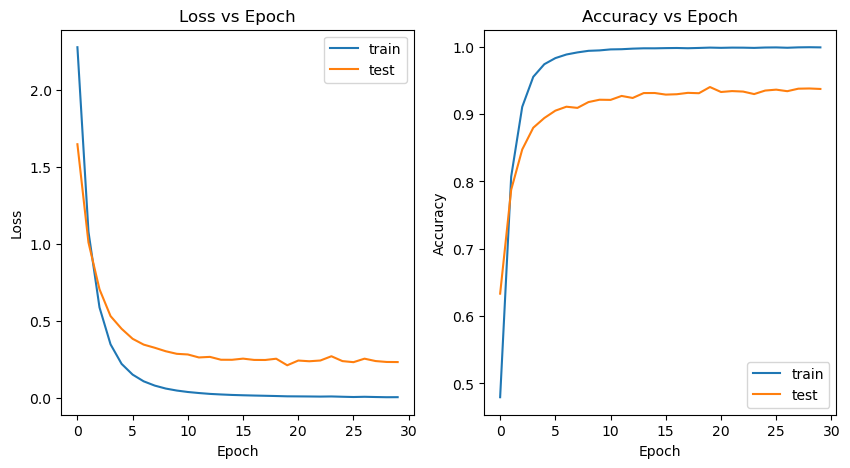

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].plot(train_losses, label='train')
axs[0].plot(test_losses, label='test')
axs[0].set_title('Loss vs Epoch')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(train_accs, label='train')
axs[1].plot(test_accs, label='test')
axs[1].set_title('Accuracy vs Epoch')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.show()


### Step 6: Visualizing the output of the model with the test data 

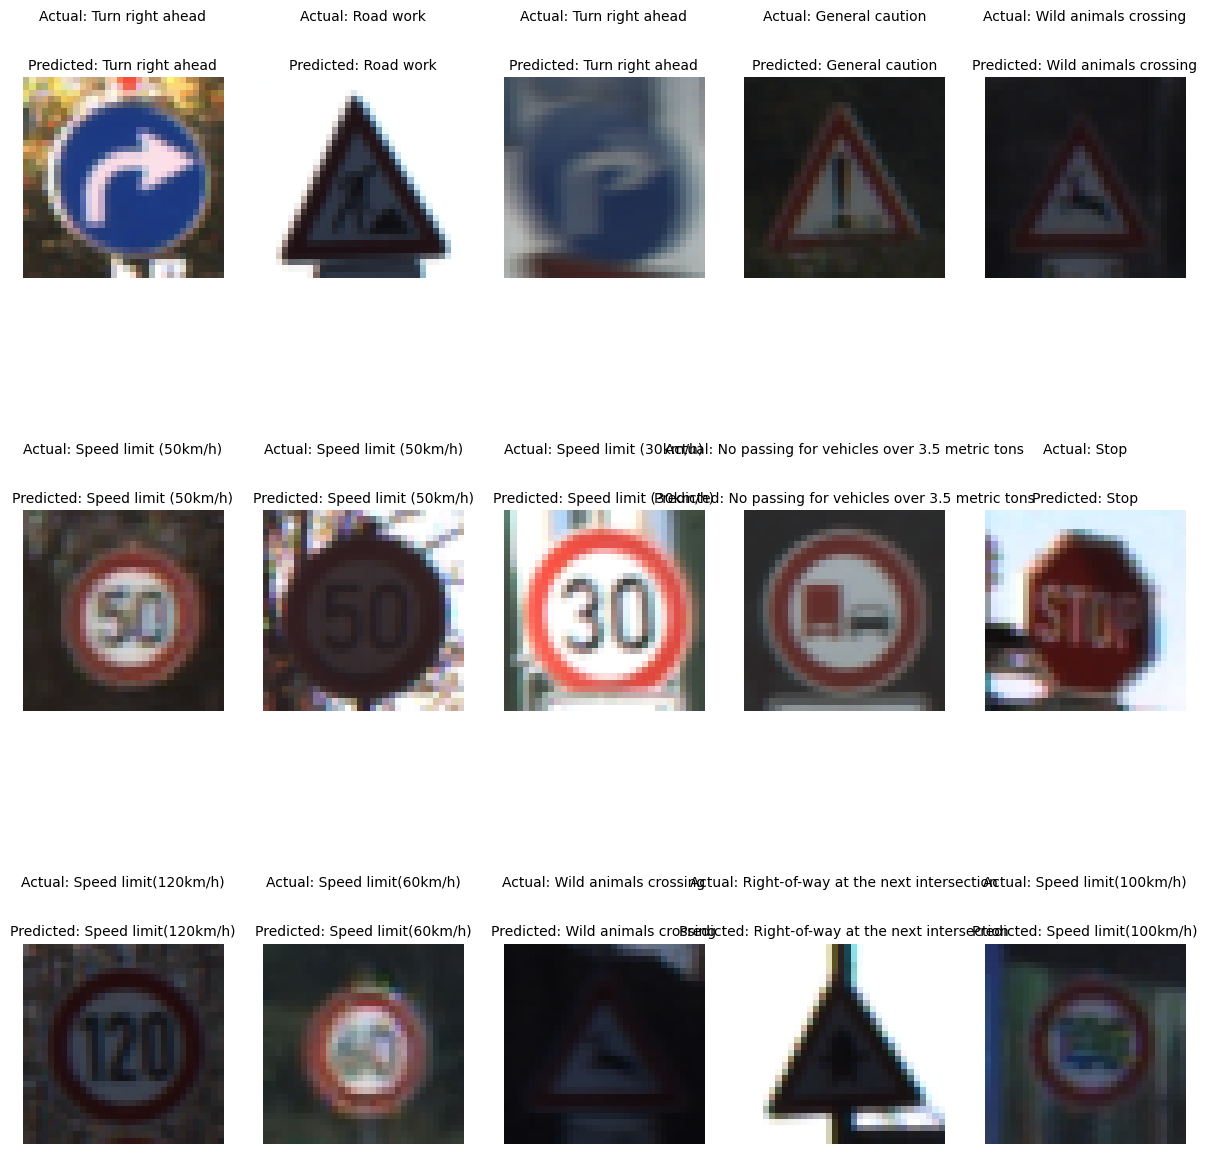

In [17]:


# Randomly select 15 images from the test set
indices = np.random.choice(len(test_dataset), 15)

# Define a dictionary to map class IDs to class names
class_names = {
          0: 'Speed limit (20km/h)',
          1: 'Speed limit (30km/h)',
          2: 'Speed limit (50km/h)',
          3:'Speed limit(60km/h)',
          4:'Speed limit(70km/h)',
          5:'Speed limit(80km/h)',
          6:'End of speed limit(80km/h)',
          7:'Speed limit(100km/h)',
          8:'Speed limit(120km/h)',
          9:'No passing',
          10:'No passing for vehicles over 3.5 metric tons',
          11:'Right-of-way at the next intersection',
          12:'Priority road',
          13:'Yield',
          14:'Stop',
          15:'No vehicles',
          16:'Vehicles over 3.5 metric tons prohibted',
          17:'No entry',
          18:'General caution',
          19:'Dangerous curve to the left',
          20:'Dangerous curve to the right',
          21:'Double curve',
          22:'Bumpy road',
          23:'Slippery road',
          24:'Road narrows on the right',
          25:'Road work',
          26:'Traffic signals',
          27:'Pedestrians',
          28:'Children crossing',
          29:'Bicycles crossing',
          30:'Beware of ice/snow',
          31:'Wild animals crossing',
          32:'End of all speed and passing limits',
          33:'Turn right ahead',
          34:'Turn left ahead',
          35:'Ahead only',
          36:'Go straight or right',
          37:'Go straight or left',
          38:'Keep right',
          39:'Keep left',
          40:'Roundabout mandatory',
          41:'End of no passing',
          42:'End of no passing by vehicles over 3.5 metric tons'}

    


# Visualizing the selected images and their predicted labels

fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

for i, index in enumerate(indices):
    # Get the image and label
    image, label = test_dataset[index]
    
    # Get the predicted label from the model
    model.eval()
    with torch.no_grad():
        output = model(image.unsqueeze(0))
        predicted_label = torch.argmax(output, dim=1).item()
    
    # Convert the image to a numpy array and display it
    image = image.permute(1, 2, 0).numpy()
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(image)
    
    # Set the title of the plot to the actual and predicted label
    actual_label = class_names[label.item()]
    predicted_label = class_names[predicted_label]
    title = f'Actual: {actual_label}\n\n\nPredicted: {predicted_label}'
    ax.set_title(title, fontsize=10)
    #ax.set_title(f'Actual: {actual_label}\n\n\nPredicted: {predicted_label}\n\n\n')
    
    # Turn off the axis labels
    ax.axis('off')

plt.show()



## Conclusion:

After running the cnn model we saw that with overall 93.73% accuracy we can predict the road signs. This model can be used in the vehicles to build a software which can detect the road signs. The positive side is that while driving its not completely possible to capture the clear image of the road sign. And our model has been trained which has images form different area in germany thus capturing wide range for proper decision making.  

### Appendix A: Project Video Link

[Video Link](https://www.youtube.com/watch?v=Wc9yb-yjBto)


### Appendix B: Github Reository Link

[Reoistory Link](https://github.com/abhishek6293/Project-)  

### Appendix C: Team Member Tasks

Kaite Hu: 
1. Building the regression model for the  UCI Machine Learning Repository: Airfoil Self-Noise Data Set along with EDA and giving detail explanation of each code. 
2. Making the power point slide for the presentation and creating the online server link of the video.

Abhishek Tiwari: 
1. Building the classification model on the Kaggle: GSTRB - German Traffic Sign Recognition Benchmark dataset along with giving explanation for each step taken. 
2. Final compliation of the project and creating the online repository of the code.
